In [16]:
# Relevant packages:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the WDI data as a csv (using pandas):
df = pd.read_csv(r"QTM350 Final Project Data.csv", encoding='latin1')

# Set up connection:
conn = sqlite3.connect(r"qtm350_project.db")
cursor = conn.cursor()

# Write 'df' to SQL:
cursor.execute("DROP TABLE IF EXISTS wdi;")
df.to_sql('wdi', conn, if_exists='replace', index=False)

542

In [2]:
# new, cleaned dataframe
# 1: create a new 'year' list (to replace the current format)
year_columns = [
    f'"{year} [YR{year}]" AS "{year}"' for year in range(1975, 2025)
]

# 2: new table only with relevant columns: country_name, indicator, and years 
cursor.execute("DROP TABLE IF EXISTS wdi_renamed;")
q_keep = f"""
CREATE TABLE wdi_renamed AS
SELECT 
    "Country Name" AS country_name,
    "Series Name" AS indicator,
    {', '.join(year_columns)}
FROM wdi
"""
conn.execute(q_keep)

In [3]:
pd.read_sql("SELECT * FROM wdi_renamed", conn).head()

,country_name,indicator,1975,1976,1977,1978,1979,1980,1981,1982,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Argentina,"Life expectancy at birth, total (years)",66.965,67.03,67.595,67.999,68.434,68.576,68.858,68.973,...,76.6,76.105,76.543,76.77,76.847,75.878,73.948,75.806,77.395,..
1,Argentina,"Mortality rate, under-5 (per 1,000 live births)",63.3,59.8,55.6,51.2,46.8,42.8,39.4,36.5,...,11.7,11.4,11,10.7,10.5,10.3,10,9.8,9.6,..
2,Argentina,"Adolescent fertility rate (births per 1,000 wo...",73.076,74.913,76.634,77.695,78.328,77.928,76.742,74.387,...,63.879,58.79,55.022,49.926,41.751,31.492,28.54,25.767,26.414,..
3,Argentina,"Prevalence of HIV, total (% of population ages...",..,..,..,..,..,..,..,..,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,..,..
4,Argentina,"Immunization, DPT (% of children ages 12-23 mo...",..,..,..,..,..,44,49,58,...,94,92,86,86,83,74,81,84,66,..


In [4]:
conn.execute("DROP TABLE IF EXISTS wdi_region;")

# writes an implicit 'if else' function in sql to create a new column 'region' based on the country name by using CASE WHEN/ELSE statements.
q_region = """
CREATE TABLE wdi_region AS
SELECT 
    country_name,
    CASE
        WHEN country_name IN (
            'Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama', 'Mexico', 'Bolivia'
        ) THEN 'Central America'
        WHEN country_name IN (
            'Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela, RB'
        ) THEN 'South America'
        WHEN country_name IN (
            'Cuba', 'Dominican Republic', 'Haiti', 'Jamaica', 'St. Martin (French part)', 'Puerto Rico'
        ) THEN 'Caribbean'
        ELSE 'Other'
    END AS region,
    indicator,
    "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989",
    "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", 
    "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019",
    "2020", "2021", "2022", "2023", "2024"
FROM wdi_renamed
"""

conn.execute(q_region)

In [5]:
conn.execute("DROP TABLE IF EXISTS wdi_long_clean;")
q_filter_non_null = """
CREATE TABLE wdi_long_clean AS
SELECT *
FROM wdi_long
WHERE value IS NOT NULL AND value != '..'
"""
conn.execute(q_filter_non_null)

In [6]:
# Here's a sample of the cleaned data:
pd.read_sql("SELECT * FROM wdi_long_clean", conn).head(25)

,year,country_name,region,indicator,value
0,1975,Argentina,South America,"Life expectancy at birth, total (years)",66.965
1,1975,Argentina,South America,"Mortality rate, under-5 (per 1,000 live births)",63.3
2,1975,Argentina,South America,"Adolescent fertility rate (births per 1,000 wo...",73.076
3,1975,Argentina,South America,Urban population,20950006
4,1975,Argentina,South America,"Unemployment, total (% of total labor force) (...",2.3
5,1975,Argentina,South America,Trade (% of GDP),11.80272429
6,1975,Argentina,South America,Surface area (sq. km),2780400
7,1975,Argentina,South America,"School enrollment, primary (% net)",96.32775
8,1975,Argentina,South America,Rural population,4924101
9,1975,Belize,Central America,"Life expectancy at birth, total (years)",65.377


In [7]:
q1_a = """
SELECT country_name, AVG(value) AS avg_life_exp
FROM wdi_long_clean
WHERE indicator = 'Life expectancy at birth, total (years)'
GROUP BY country_name
ORDER BY avg_life_exp DESC
LIMIT 10
"""
q1_a_table = pd.read_sql(q1_a, conn)
print(q1_a_table)

               country_name  avg_life_exp
0                Costa Rica     76.953000
1  St. Martin (French part)     76.319592
2               Puerto Rico     75.974449
3                     Chile     75.545469
4                      Cuba     75.323898
5                   Uruguay     74.259551
6                    Panama     73.476163
7                 Argentina     73.002898
8             Venezuela, RB     71.322490
9                  Colombia     71.205878


In [8]:
q1_b = """
SELECT country_name, AVG(value) AS avg_life_exp
FROM wdi_long_clean
WHERE indicator = 'Life expectancy at birth, total (years)'
  AND year IN ('1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989')
GROUP BY country_name
ORDER BY avg_life_exp DESC
LIMIT 10
"""
q1_b_table = pd.read_sql(q1_b, conn)
print(q1_b_table)

               country_name  avg_life_exp
0                Costa Rica       74.5500
1                      Cuba       73.4186
2               Puerto Rico       73.0772
3  St. Martin (French part)       73.0160
4                   Uruguay       71.7568
5                     Chile       71.3751
6                    Panama       70.2783
7                 Argentina       69.8508
8             Venezuela, RB       69.7803
9                    Belize       68.2004


In [9]:
q1_c = """
SELECT country_name, AVG(value) AS avg_life_exp
FROM wdi_long_clean
WHERE indicator = 'Life expectancy at birth, total (years)'
  AND year IN ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')
GROUP BY country_name
ORDER BY avg_life_exp DESC
LIMIT 10
"""
q1_c_table = pd.read_sql(q1_c, conn)
print(q1_c_table)

               country_name  avg_life_exp
0                Costa Rica       80.0098
1               Puerto Rico       79.9724
2                     Chile       79.8613
3  St. Martin (French part)       79.4908
4                      Cuba       77.7397
5                    Panama       77.4483
6                   Uruguay       77.1427
7                 Argentina       76.2544
8                   Ecuador       76.0896
9                  Colombia       75.9536


In [10]:
q2 = """
SELECT country_name,
       MAX(CASE WHEN indicator = 'Immunization, DPT (% of children ages 12-23 months)' THEN value END) AS max_dpt,
       MAX(CASE WHEN indicator = 'Immunization, HepB3 (% of one-year-old children)' THEN value END) AS max_hepb3,
       MAX(CASE WHEN indicator = 'Immunization, measles (% of children ages 12-23 months)' THEN value END) AS max_measles,
       (MAX(CASE WHEN indicator = 'Immunization, DPT (% of children ages 12-23 months)' THEN value END) +
        MAX(CASE WHEN indicator = 'Immunization, HepB3 (% of one-year-old children)' THEN value END) +
        MAX(CASE WHEN indicator = 'Immunization, measles (% of children ages 12-23 months)' THEN value END)) / 3 AS agg_immunization_rate
FROM wdi_long_clean
WHERE indicator IN (
    'Immunization, DPT (% of children ages 12-23 months)',
    'Immunization, HepB3 (% of one-year-old children)',
    'Immunization, measles (% of children ages 12-23 months)'
)
GROUP BY country_name
ORDER BY agg_immunization_rate DESC
LIMIT 23;
"""
q2_table = pd.read_sql(q2, conn)
print(q2_table)

          country_name max_dpt max_hepb3 max_measles  agg_immunization_rate
0               Mexico      99        99          99                     99
1             Honduras      99        99          99                     99
2               Guyana      99        99          99                     99
3          El Salvador      99        99          99                     99
4                 Cuba      99        99          99                     99
5               Brazil      99        99          99                     99
6               Panama      99        98          99                     98
7            Nicaragua      98        98          99                     98
8           Costa Rica      99        98          99                     98
9                Chile      99        97          99                     98
10              Belize      98        98          99                     98
11             Uruguay      97        96          99                     97
12          

In [29]:
region_mapping = {
    'Argentina': 'South America',
    'Belize': 'Central America',
    'Costa Rica': 'Central America',
    'El Salvador': 'Central America',
    'Guatemala': 'Central America',
    'Honduras': 'Central America',
    'Nicaragua': 'Central America',
    'Panama': 'Central America',
    'Mexico': 'Central America',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Ecuador': 'South America',
    'Guyana': 'South America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Suriname': 'South America',
    'Uruguay': 'South America',
    'Venezuela, RB': 'South America',
    'Cuba': 'Caribbean',
    'Dominican Republic': 'Caribbean',
    'Haiti': 'Caribbean',
    'Jamaica': 'Caribbean',
    'St. Martin (French part)': 'Caribbean',
    'Puerto Rico': 'Caribbean',
}


# Add the Region column
df['Region'] = df['Country Name'].map(region_mapping)

# Filtering out countries not defined in our region mapping
df = df[df['Region'].notna()]

In [30]:
df.head()

,Country Name,Country Code,Series Name,Series Code,1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],...,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024],Region
0,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,66.965,67.03,67.595,67.999,68.434,68.576,...,76.105,76.543,76.77,76.847,75.878,73.948,75.806,77.395,..,South America
1,Argentina,ARG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,63.3,59.8,55.6,51.2,46.8,42.8,...,11.4,11,10.7,10.5,10.3,10,9.8,9.6,..,South America
2,Argentina,ARG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,73.076,74.913,76.634,77.695,78.328,77.928,...,58.79,55.022,49.926,41.751,31.492,28.54,25.767,26.414,..,South America
3,Argentina,ARG,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,..,..,..,..,..,..,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,..,..,South America
4,Argentina,ARG,"Immunization, DPT (% of children ages 12-23 mo...",SH.IMM.IDPT,..,..,..,..,..,44,...,92,86,86,83,74,81,84,66,..,South America


In [31]:
# Fix year columns
year_columns = [col for col in df.columns if '[YR' in col]

# Melt from wide to long format
df_long = df.melt(
    id_vars=['Country Name', 'Country Code', 'Region', 'Series Name', 'Series Code'],
    value_vars=year_columns,
    var_name='Year',
    value_name='Value'
)

# Clean Year (remove [YRxxxx] formatting)
df_long['Year'] = df_long['Year'].str.extract('(\d+)').astype(int)

# Clean Value: Turn '..' into NaN, ensure numeric
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

# Now your structure is:
# Country Name | Country Code | Region | Series Name | Series Code | Year | Value
print(df_long.head())

  Country Name Country Code         Region  \
0    Argentina          ARG  South America   
1    Argentina          ARG  South America   
2    Argentina          ARG  South America   
3    Argentina          ARG  South America   
4    Argentina          ARG  South America   

                                         Series Name     Series Code  Year  \
0            Life expectancy at birth, total (years)  SP.DYN.LE00.IN  1975   
1    Mortality rate, under-5 (per 1,000 live births)     SH.DYN.MORT  1975   
2  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT  1975   
3  Prevalence of HIV, total (% of population ages...  SH.DYN.AIDS.ZS  1975   
4  Immunization, DPT (% of children ages 12-23 mo...     SH.IMM.IDPT  1975   

    Value  
0  66.965  
1  63.300  
2  73.076  
3     NaN  
4     NaN  


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


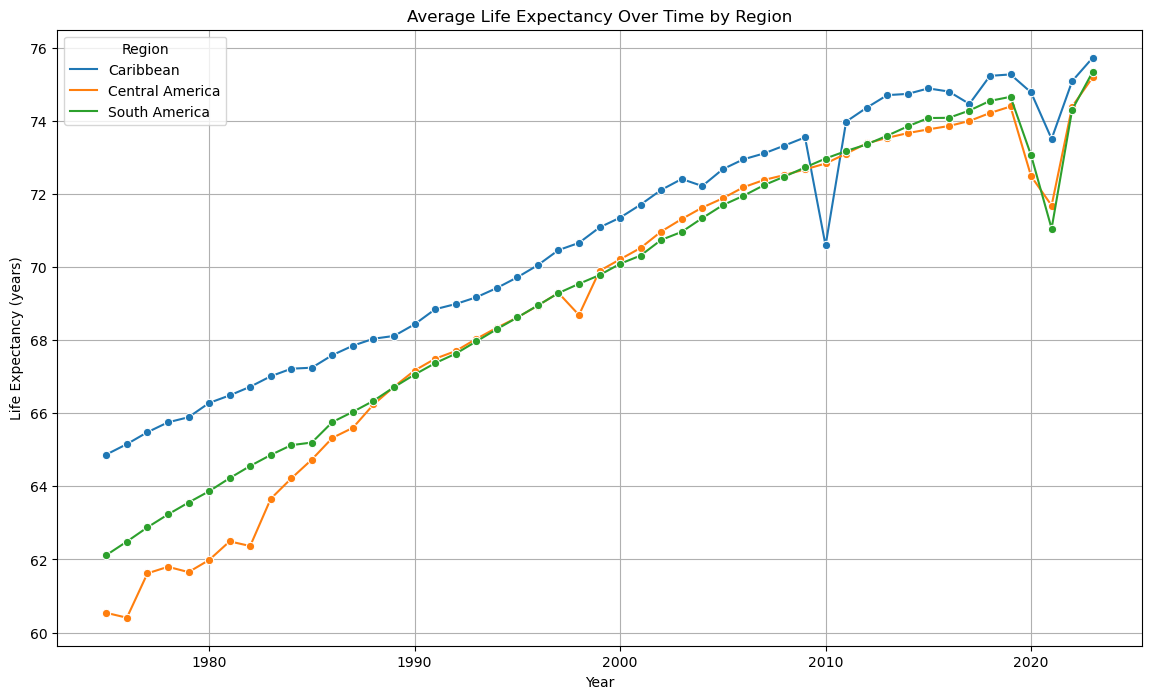

In [32]:
# Filter only Life Expectancy
life_exp = df_long[df_long['Series Name'] == 'Life expectancy at birth, total (years)'].copy()

# Group by Region and Year, and take average across countries
region_life_exp = life_exp.groupby(['Region', 'Year'])['Value'].mean().reset_index()

# Plot
plt.figure(figsize=(14,8))
sns.lineplot(
    data=region_life_exp,
    x='Year',
    y='Value',
    hue='Region',
    marker='o'
)

plt.title('Average Life Expectancy Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.legend(title='Region')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


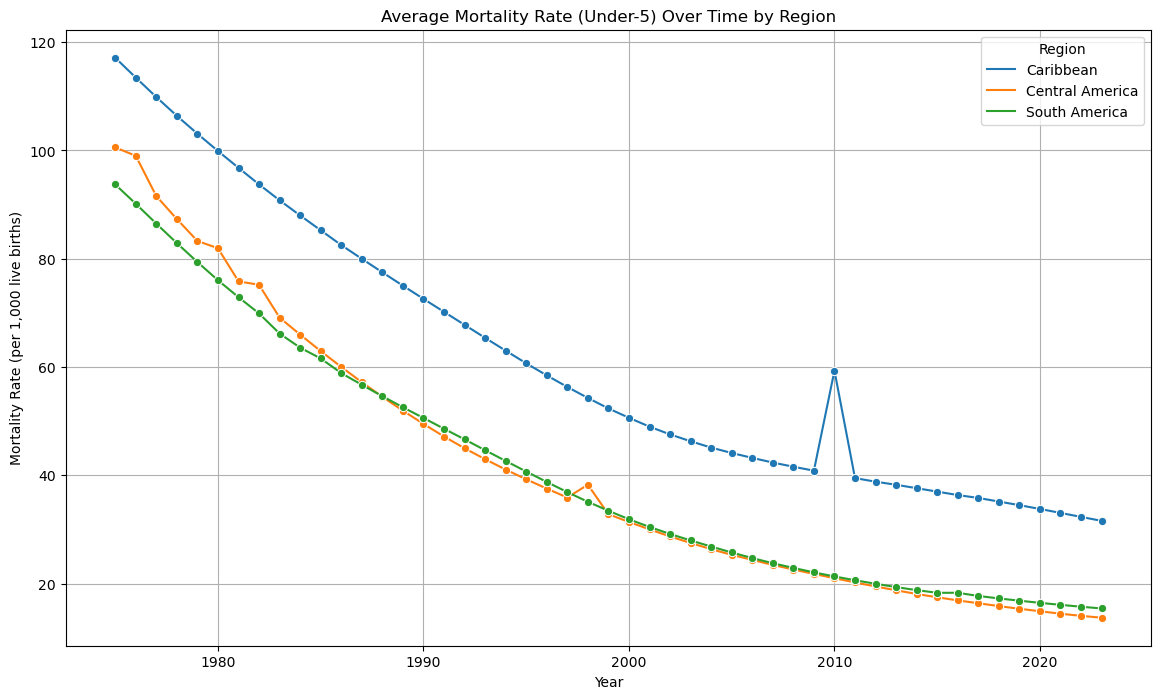

In [33]:
# Filter only Mortality Rate
mortality = df_long[df_long['Series Name'] == 'Mortality rate, under-5 (per 1,000 live births)'].copy()

# Group by Region and Year, and average across countries
region_mortality = mortality.groupby(['Region', 'Year'])['Value'].mean().reset_index()

# Plot
plt.figure(figsize=(14,8))
sns.lineplot(
    data=region_mortality,
    x='Year',
    y='Value',
    hue='Region',
    marker='o'
)

plt.title('Average Mortality Rate (Under-5) Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 1,000 live births)')
plt.grid(True)
plt.legend(title='Region')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


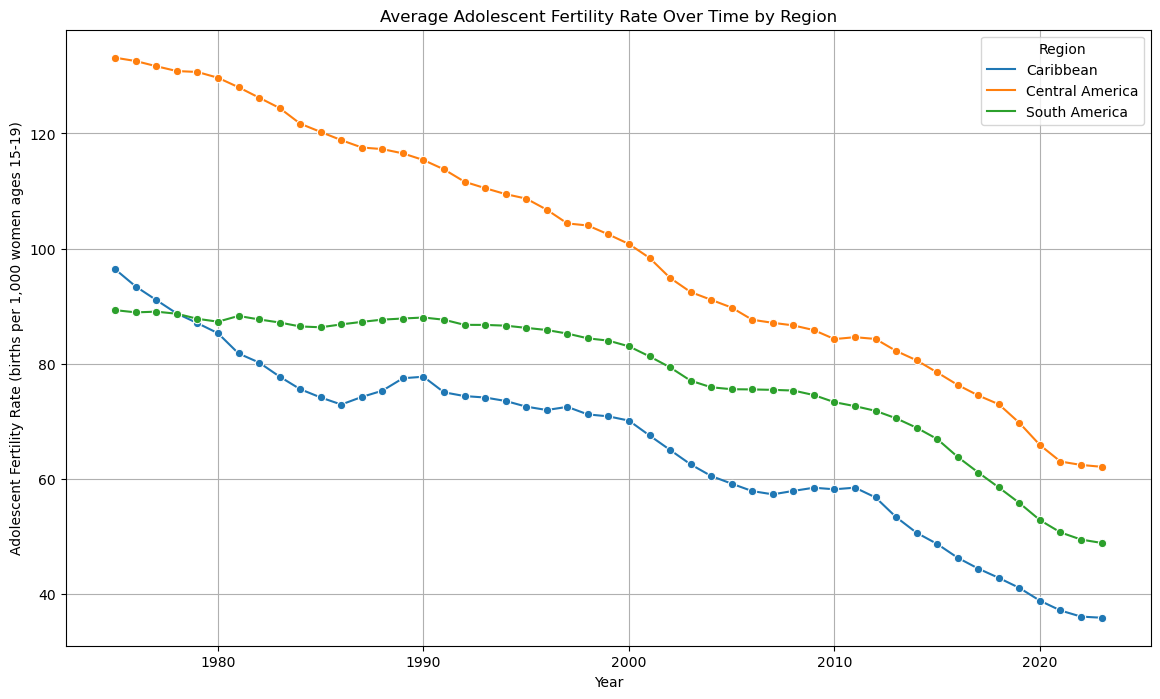

In [37]:
# Filter only Adolescent Fertility Rate
adolescent_fertility = df_long[df_long['Series Name'] == 'Adolescent fertility rate (births per 1,000 women ages 15-19)'].copy()

# Group by Region and Year, and average across countries
region_adolescent_fertility = adolescent_fertility.groupby(['Region', 'Year'])['Value'].mean().reset_index()

# Plot
plt.figure(figsize=(14,8))
sns.lineplot(
    data=region_adolescent_fertility,
    x='Year',
    y='Value',
    hue='Region',
    marker='o'
)

plt.title('Average Adolescent Fertility Rate Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Adolescent Fertility Rate (births per 1,000 women ages 15-19)')
plt.grid(True)
plt.legend(title='Region')
plt.show()


In [35]:
# Investigating sharp spikes for Caribbean region

# Step 1: Focus on Caribbean mortality
caribbean_mortality = mortality[mortality['Region'] == 'Caribbean'].copy()
caribbean_life_exp = life_exp[life_exp['Region'] == 'Caribbean'].copy()

# Step 2: Choose a suspicious year range (e.g., 2000-2024)
suspect_mort_years = caribbean_mortality[(caribbean_mortality['Year'] >= 2009) & (caribbean_mortality['Year'] <= 2011)]
suspect_life_years = caribbean_life_exp[(caribbean_life_exp['Year'] >= 2009) & (caribbean_life_exp['Year'] <= 2011)]


# Step 3: See country-level stats year by year
pivot_mort = suspect_mort_years.pivot_table(
    index='Year',
    columns='Country Name',
    values='Value'
)

pivot_life = suspect_life_years.pivot_table(
    index='Year',
    columns='Country Name',
    values='Value'
)

print(pivot_mort)
print(pivot_life)


Country Name  Cuba  Dominican Republic  Haiti
Year                                         
2009           6.3                35.2   81.1
2010           6.2                35.1  136.7
2011           6.1                35.0   77.4
Country Name    Cuba  Dominican Republic   Haiti  Puerto Rico  \
Year                                                            
2009          77.584              71.587  61.694       78.377   
2010          77.876              72.039  45.577       78.717   
2011          78.051              72.496  61.581       78.766   

Country Name  St. Martin (French part)  
Year                                    
2009                            78.513  
2010                            78.752  
2011                            79.016  
